<a href="https://colab.research.google.com/github/LucasCarattaOliva/lucascaratta/blob/main/Boston_house_prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [ ]:
df = pd.read_csv('boston.csv')

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
df1 =df.corr()

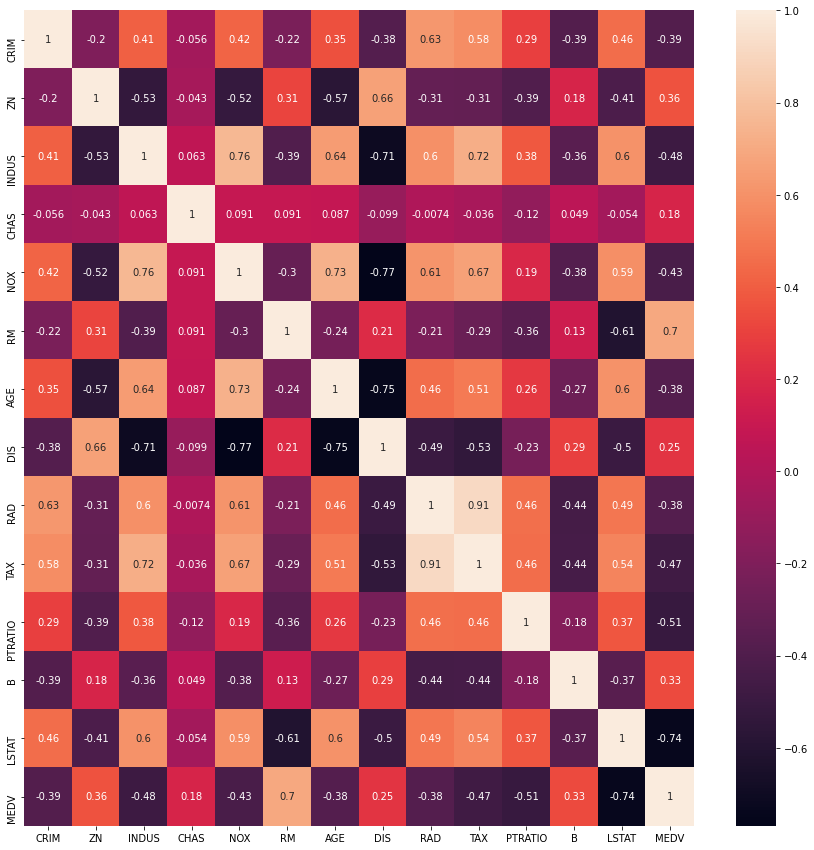

In [ ]:
plt.figure(figsize = (15,15));
sns.heatmap(df1, annot = True);

1) CRIM: per capita crime rate by town

2) ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

3) INDUS: proportion of non-retail business acres per town

4) CHAS: Charles River dummy variable (1 if tract bounds river; 0 otherwise)

5) NOX: nitric oxides concentration (parts per 10 million) [parts/10M]

6) RM: average number of rooms per dwelling

7) AGE: proportion of owner-occupied units built prior to 1940

8) DIS: weighted distances to five Boston employment centres

9) RAD: index of accessibility to radial highways

10) TAX: full-value property-tax rate per $10,000 [$/10k]

11) PTRATIO: pupil-teacher ratio by town

12) B: The result of the equation B=1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

13) LSTAT: % lower status of the population

Output variable:
1) MEDV: Median value of owner-occupied homes in $1000's [k$]

In [ ]:
df = pd.DataFrame(df)

In [ ]:
x = df['RM'].to_numpy().reshape(-1,1)

In [ ]:
y = df['MEDV'].to_numpy().reshape(-1,1)

In [ ]:
model = LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
r_sq = model.score(x, y)
r_sq

0.4835254559913343

In [ ]:
s =model.intercept_
print(s)

[-34.67062078]


In [ ]:
i =model.coef_
print(i)

[[9.10210898]]


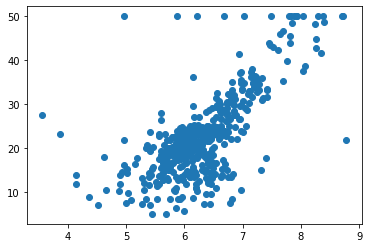

In [ ]:
plt.scatter(x,y);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


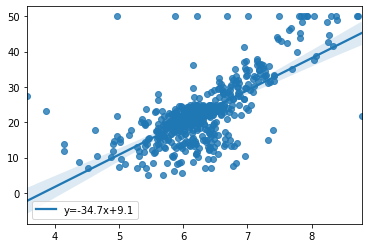

In [ ]:
ax = sns.regplot(x, y, line_kws={'label':"y={0:.1f}x+{1:.1f}".format(s.item(),i.item())});
ax.legend();
plt.show();

In [ ]:
xm = df.iloc[:,0:13]
xm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48


Regressão Múltipla

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(xm,y,test_size = 0.25,random_state = 0)

In [ ]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
regr.coef_

array([[-1.17735289e-01,  4.40174969e-02, -5.76814314e-03,
         2.39341594e+00, -1.55894211e+01,  3.76896770e+00,
        -7.03517828e-03, -1.43495641e+00,  2.40081086e-01,
        -1.12972810e-02, -9.85546732e-01,  8.44443453e-03,
        -4.99116797e-01]])

In [ ]:
r2 =regr.score(X_train,y_train)
r2

0.7697699488741149

In [ ]:
regr.intercept_

array([36.93325546])

In [ ]:
p = regr.predict(X_test);

In [ ]:
mean_absolute_error(y_test, p)

3.668330148135715

Decision Tree

In [ ]:
regressao_casas = DecisionTreeRegressor(min_samples_split=30)

In [ ]:
regressao_casas.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=30,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
regressao_casas.feature_importances_

array([0.04768724, 0.        , 0.00645881, 0.        , 0.00961172,
       0.25389325, 0.00165232, 0.02353937, 0.        , 0.00340837,
       0.01114472, 0.00345155, 0.63915265])

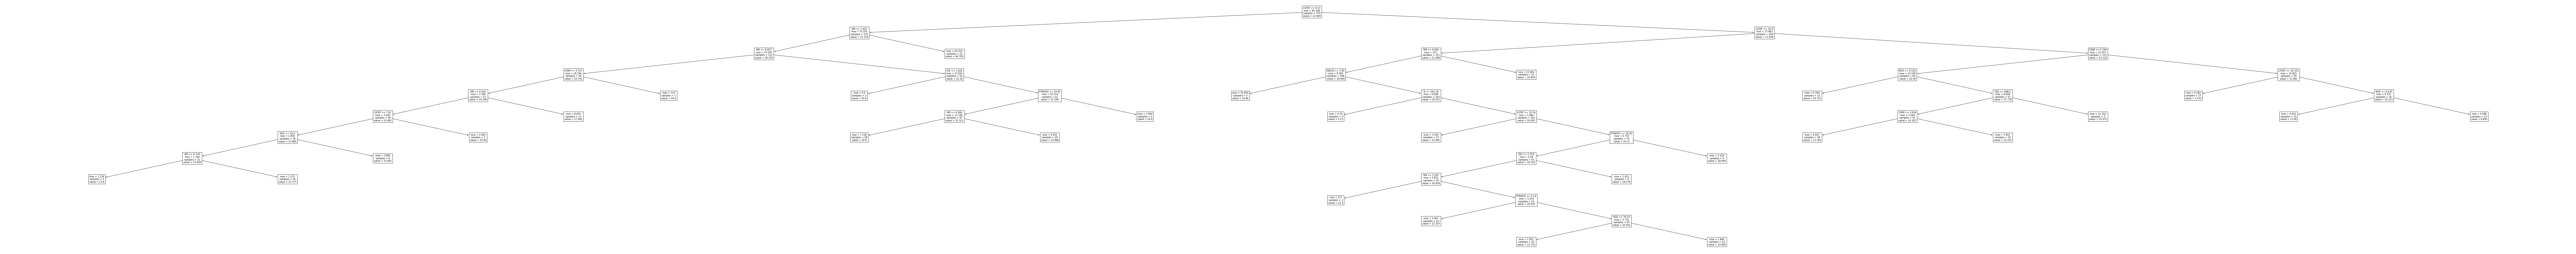

In [ ]:
prev = ['CRIM',	'ZN',	'INDUS','CHAS' , 'NOX',	'RM',	'AGE',	'DIS'	,'RAD' ,'TAX',	'PTRATIO'	,'B','LSTAT']
plt.figure(figsize = (200,20));
tree.plot_tree(regressao_casas, fontsize=10,feature_names= prev);


In [ ]:
p1 = regressao_casas.predict(X_test);

In [ ]:
mean_absolute_error(y_test, p1)

2.900736858802029

In [ ]:
r2_score(y_test, p1) # r quadrado do pacote sklearn.metrics

0.7004451380688185

In [ ]:
regressao_casas.score(X_test,y_test)

0.7004451380688185

Decision Tree para uma Variavel

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size = 0.25,random_state = 0)

In [ ]:
regressao_casas1 = DecisionTreeRegressor(min_samples_split=10)

In [ ]:
regressao_casas1.fit(X_train1, y_train1)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=10,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

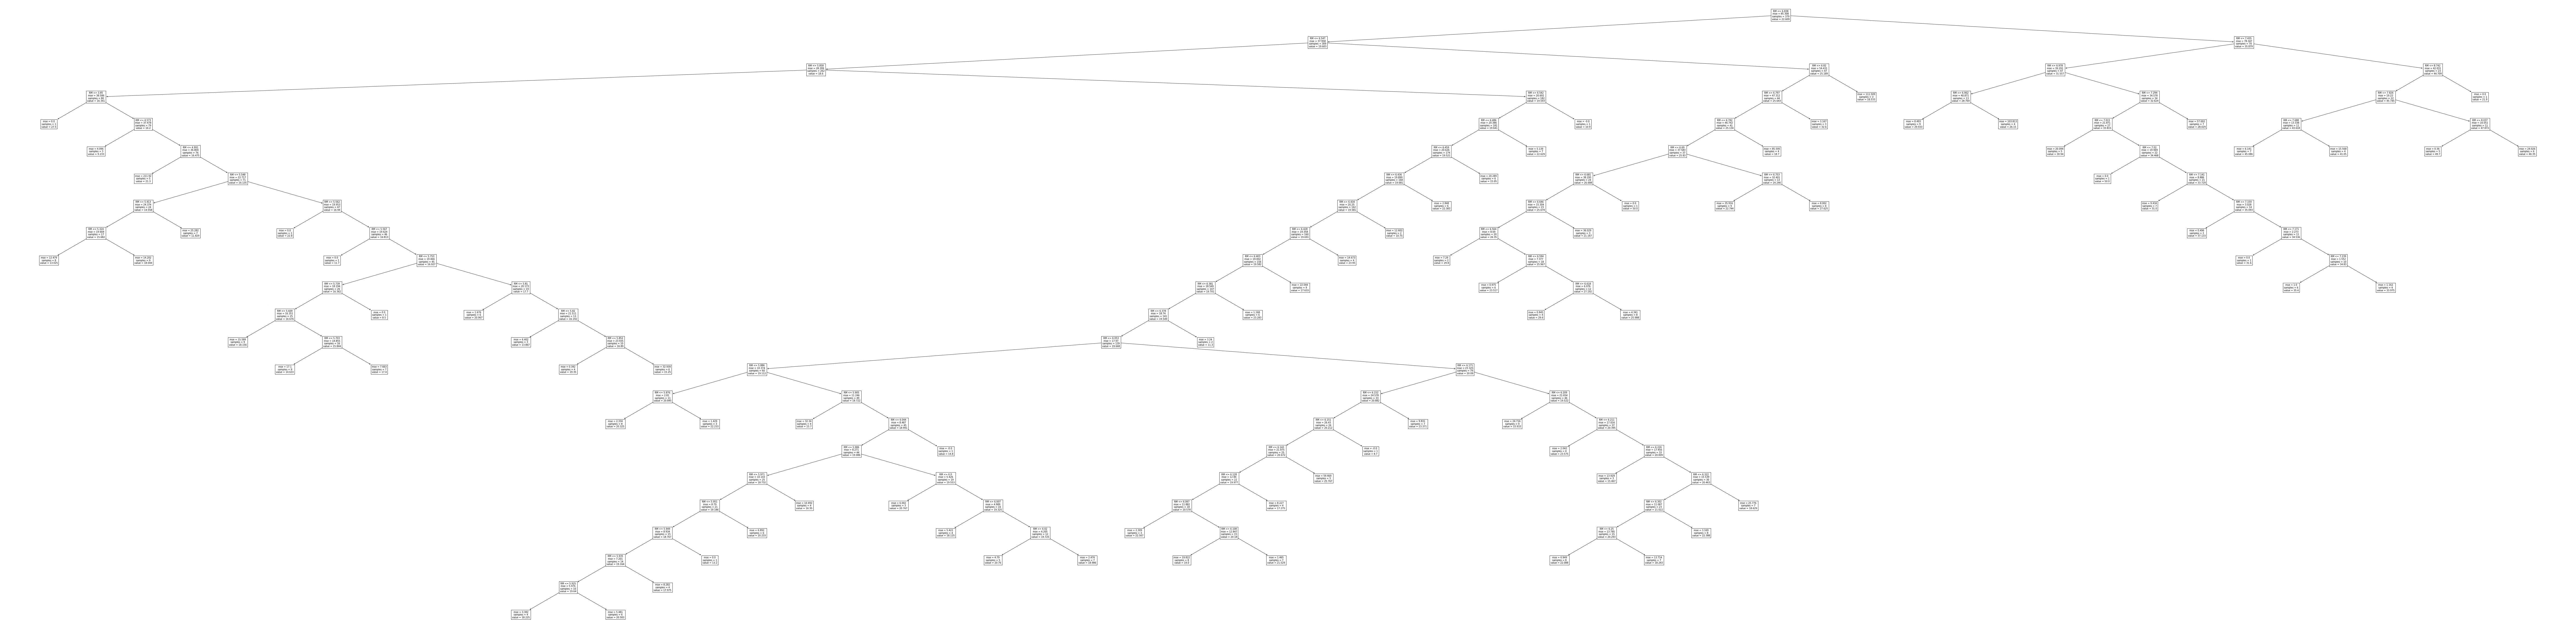

In [ ]:
prev1 = ['RM'];
plt.figure(figsize = (200,50));
tree.plot_tree(regressao_casas1, fontsize=10,feature_names= prev1);